# Online Retail using Association Rule

One year's worth of of transactions (between 01/12/2009 and 09/12/2011) from an internationally accessible online retail store registered and based in United Kingdom (UK). The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers. In this dataset, we will be exploring the items commonly bought together and focusing on 4 countries - UK, Germany, France and EIRE. 

Dataset Link: https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset

# Attribute Information

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

# Import Libraries and Dataset

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Read dataset
dataset = pd.read_excel('Online Retail.xlsx')

# Data Understanding

In [3]:
#Look at the dataset
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Total number of rows and columns
dataset.shape

(541909, 8)

In [5]:
#Column Names
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
#Data Types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#Check missing values
dataset.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#Check duplicate records in the dataset
dataset.duplicated().sum()

5268

There are a total of 541,909 records in this Dataset with a total of 136,534 missing values and 5,268 duplicate records.

# Data Clean

In [9]:
#Drop all rows with null values
dataset.dropna(axis=0, inplace=True)

#Convert InvoiceNo columns to String
dataset["InvoiceNo"] = dataset["InvoiceNo"].astype('str')

#Drop all cancelled transactions
dataset = dataset[~dataset["InvoiceNo"].str.contains("C")]

#Remove white spaces
dataset['Description'] = dataset['Description'].str.strip()

1. As we have sufficient dataset, we will be dropping records with missing values. 

2. As we are accessing successfully bought items, we will also be removing all canceled transactions

In [10]:
#Total records after removing records
dataset.shape

(397924, 8)

# Exploratory Data Analysis 

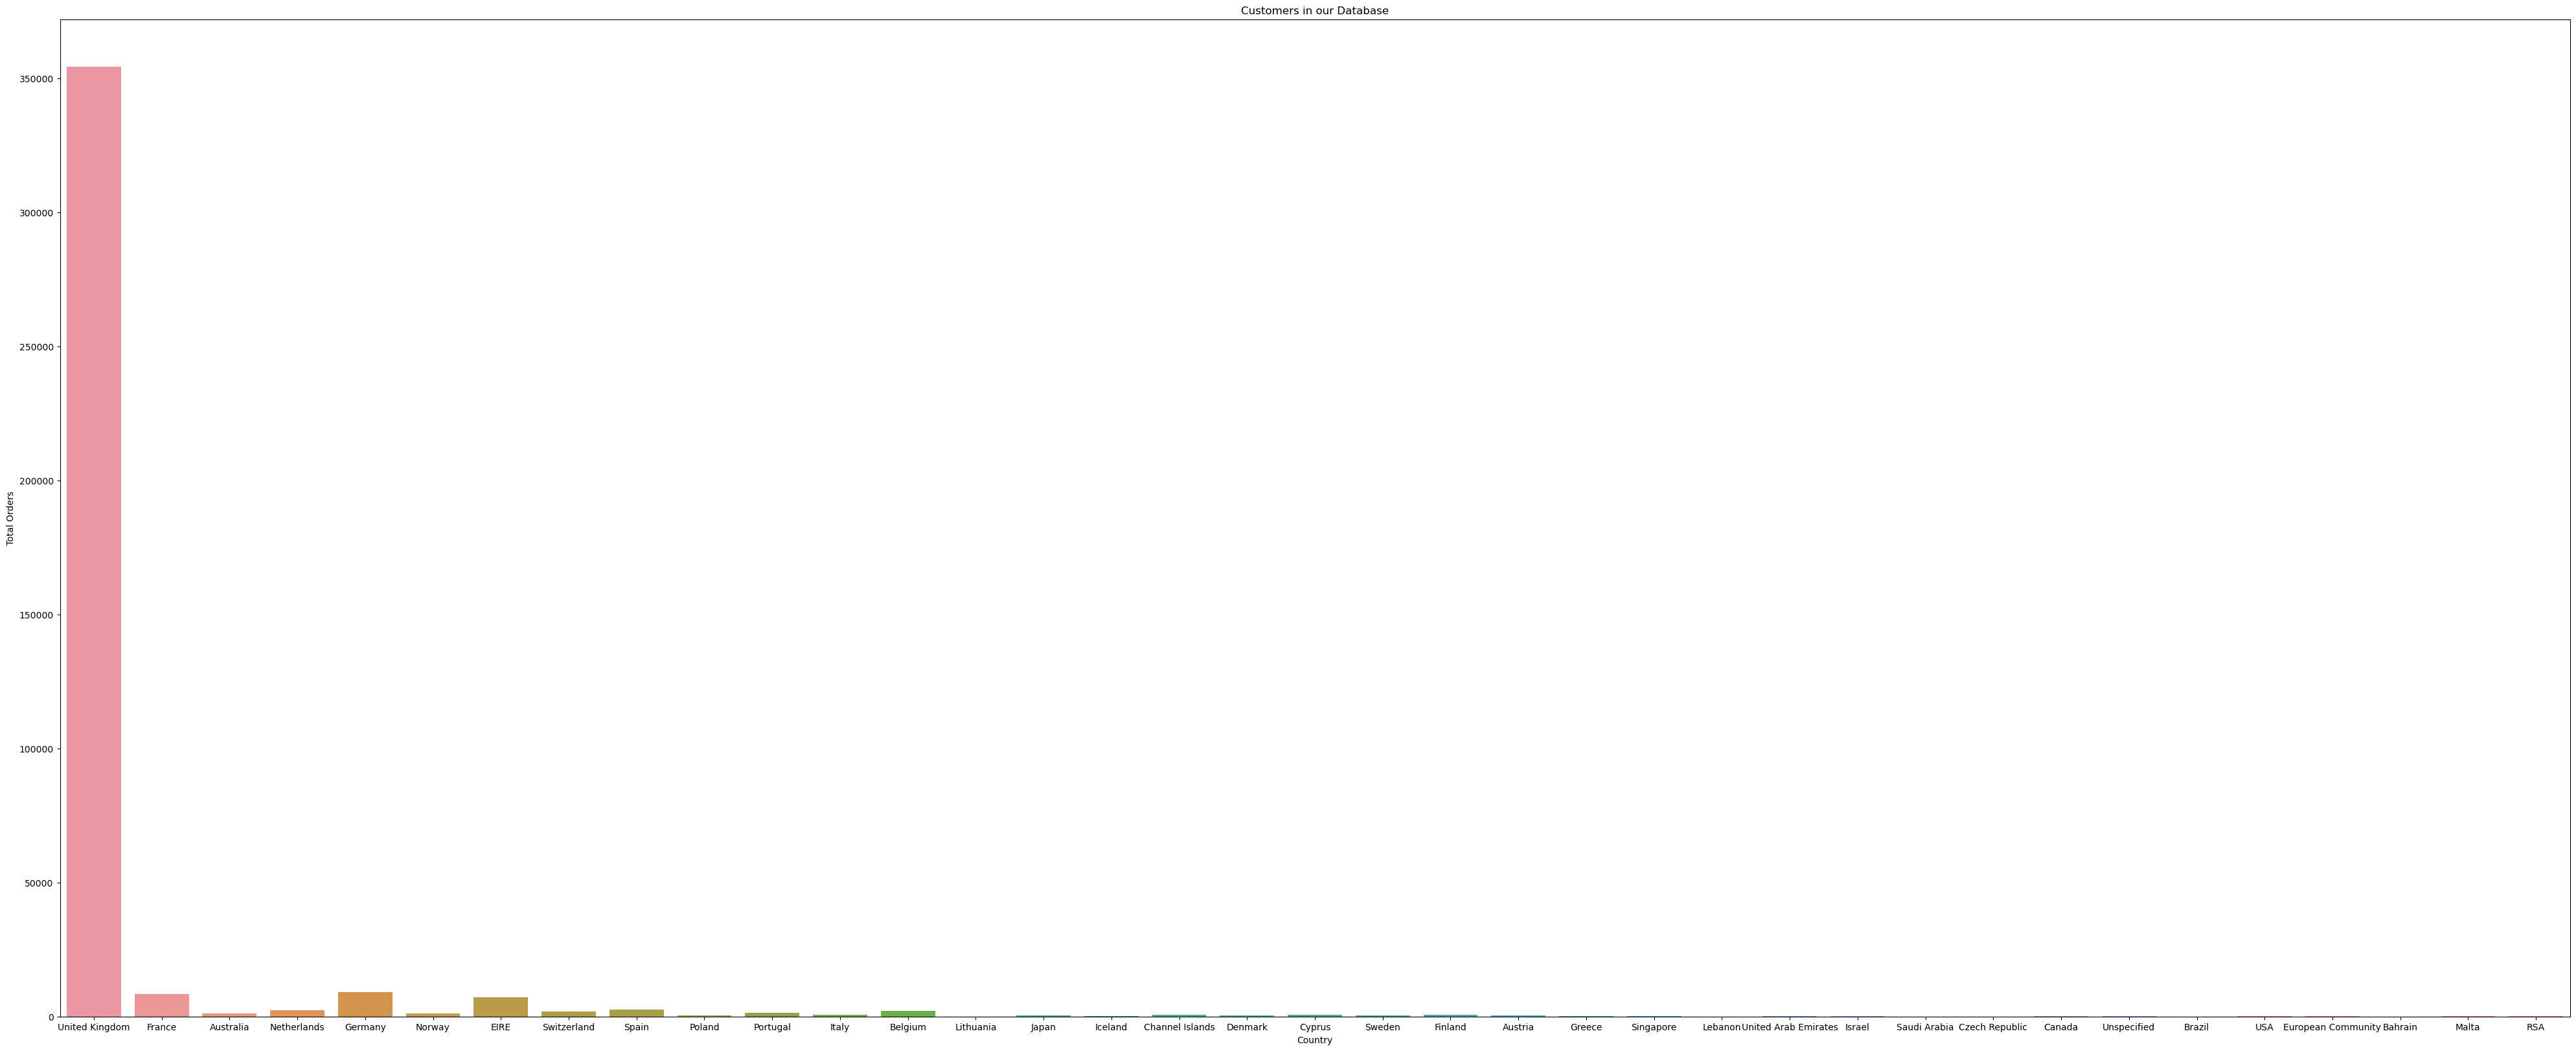

In [11]:
#Setting dimension of the plot
plt.figure(figsize=(50,20))

#Bar Plot based on Countries in our Database
sns.countplot(dataset['Country']);
plt.title('Customers in our Database')
plt.xlabel('Country')
plt.ylabel('Total Orders')
plt.show()

In [12]:
#Countries count in our Dataset
print(dataset['Country'].value_counts())

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

Text(0.5, 1.0, 'Top 10 Countries')

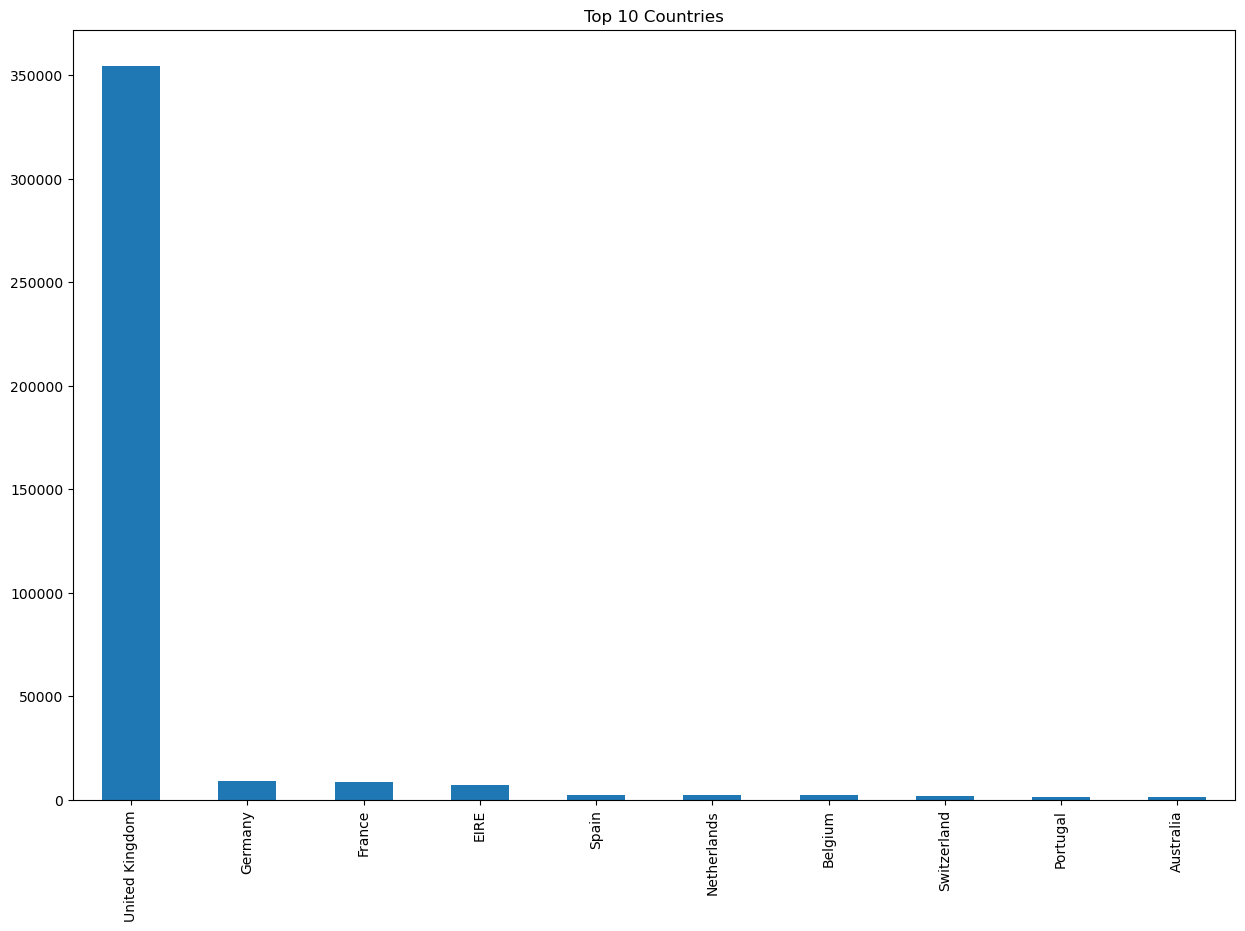

In [13]:
#Top 10 countries in our database
top_10 = dataset['Country'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(15,10))
plt.title('Top 10 Countries')

Text(0.5, 1.0, 'Top 30 items sold')

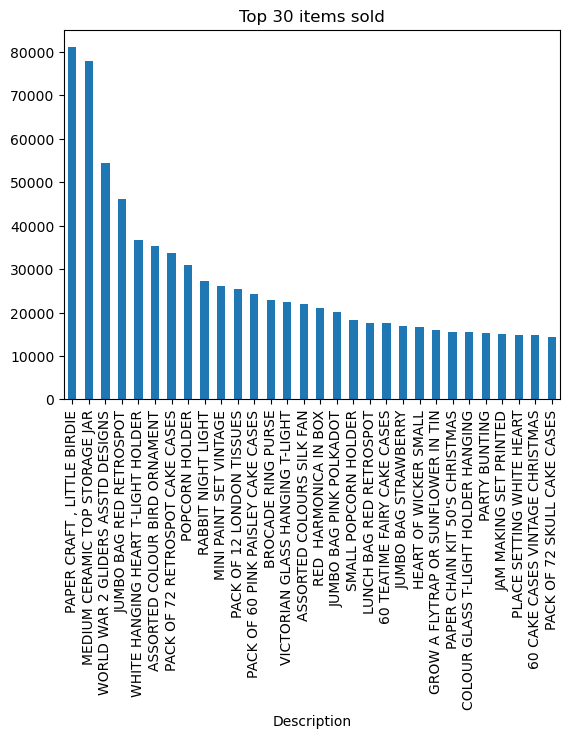

In [24]:
#No of freq sold itms
item_sold = dataset.groupby('Description')
item_sold_by_quantity = item_sold['Quantity'].agg(np.sum).sort_values(ascending=False)

#Show top 30 items sold
item_sold_by_quantity.head(30)

#Plot in a bar graph
item_sold_by_quantity.head(30).plot.bar()
plt.title('Top 30 items sold')

In [25]:
#Show top 30 items sold
item_sold_by_quantity.head(30)

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
JUMBO BAG RED RETROSPOT                46181
WHITE HANGING HEART T-LIGHT HOLDER     36725
ASSORTED COLOUR BIRD ORNAMENT          35362
PACK OF 72 RETROSPOT CAKE CASES        33693
POPCORN HOLDER                         30931
RABBIT NIGHT LIGHT                     27202
MINI PAINT SET VINTAGE                 26076
PACK OF 12 LONDON TISSUES              25345
PACK OF 60 PINK PAISLEY CAKE CASES     24264
BROCADE RING PURSE                     22963
VICTORIAN GLASS HANGING T-LIGHT        22433
ASSORTED COLOURS SILK FAN              21876
RED  HARMONICA IN BOX                  20975
JUMBO BAG PINK POLKADOT                20165
SMALL POPCORN HOLDER                   18252
LUNCH BAG RED RETROSPOT                17697
60 TEATIME FAIRY CAKE CASES            17689
JUMBO BAG STRAWBERRY                   16807
HEART OF WICKER SMALL                  1677

Evidently, most transactions are happening in the UK as this is a UK-based online retailer. 

# Data Cleaning

Before we start working on the model, we need to know that Apriori Algorithm is only able to read value 0 and 1. If the item is purchased, 1 will be reflected; otherwise, 0.

In this table, we used groupby on invoice no and the item bought with the quantity sold and hot-encoded them to be machine-readable. 

Hence, we will be applying this method across the 4 countries we will be focusing on - UK, Germany, France and EIRE.

In [16]:
#Transaction in United Kingdom
basket_UK = (dataset[dataset['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
  
#Transaction in Germany
basket_Germany = (dataset[dataset['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
  
#Transaction in France
basket_France = (dataset[dataset['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

#Transaction in EIRE
basket_EIRE = (dataset[dataset['Country'] =="EIRE"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [17]:
#Hot Encode
def hot_encode(X):
    if (X <= 0):
        return 0
    else: 
        return 1

In [18]:
#Encoding the datasets
#United Kingdom
basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded

#Germany  
basket_encoded = basket_Germany.applymap(hot_encode)
basket_Germany = basket_encoded
  
#France
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded
  
#EIRE
basket_encoded = basket_EIRE.applymap(hot_encode)
basket_EIRE = basket_encoded

In [19]:
basket_UK.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

Apriori Algorithm is used. Support, Confidence and Lift measures how strong the two items are associated with one another. 

Support - How frequent an item is in all transactions 

Confidence - Probability of the consequent (item 2 placed in the cart) occuring on the cart provided that the antecedent (item 1 in the cart) is already present. 

Lift - Calculates the conditional probability of occurrence of consequent (item 2) given antecedent (item 1).

In [20]:
#Building apriori model - United Kingdom
freq = apriori(basket_UK, min_support=0.01, max_len=2, use_colnames = True)
  
#Collect rules in dataframe
rules = association_rules(freq, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
148,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.010751,0.010872,0.010151,0.944134,86.844687,0.010034,17.705400
149,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.010872,0.010751,0.010151,0.933702,86.844687,0.010034,14.921166
512,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.012553,0.017298,0.010691,0.851675,49.234483,0.010474,6.625311
533,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.013634,0.015977,0.011532,0.845815,52.939750,0.011314,6.382092
587,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.014896,0.024086,0.012493,0.838710,34.822138,0.012134,6.050670
111,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029611,0.036759,0.024266,0.819473,22.293137,0.023177,5.335706
511,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.012553,0.015617,0.010151,0.808612,51.779187,0.009955,5.143404
508,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE KITCHEN),0.015617,0.017298,0.012553,0.803846,46.469565,0.012283,5.009852
47,(KITCHEN METAL SIGN),(BATHROOM METAL SIGN),0.013034,0.024206,0.010211,0.783410,32.364753,0.009895,4.505263
558,(SMALL MARSHMALLOWS PINK BOWL),(SMALL DOLLY MIX DESIGN ORANGE BOWL),0.016277,0.020662,0.012673,0.778598,37.682775,0.012337,4.423344


In [21]:
#Building apriori model - Germany
freq = apriori(basket_Germany, min_support=0.01, max_len=2, use_colnames = True)
  
#Collect rules in dataframe
rules = association_rules(freq, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2935,(POPPY'S PLAYHOUSE BATHROOM),(POPPY'S PLAYHOUSE LIVINGROOM),0.010941,0.013129,0.010941,1.0,76.166667,0.010797,inf
3617,(RIBBON REEL CHRISTMAS PRESENT),(RIBBON REEL CHRISTMAS SOCK BAUBLE),0.010941,0.015317,0.010941,1.0,65.285714,0.010773,inf
4139,(WHITE ROCKING HORSE HAND PAINTED),(STAR WREATH DECORATION WITH BELL),0.010941,0.015317,0.010941,1.0,65.285714,0.010773,inf
1536,(STAR WREATH DECORATION WITH BELL),(HEART WREATH DECORATION WITH BELL),0.015317,0.019694,0.015317,1.0,50.777778,0.015016,inf
1538,(WHITE ROCKING HORSE HAND PAINTED),(HEART WREATH DECORATION WITH BELL),0.010941,0.019694,0.010941,1.0,50.777778,0.010725,inf
2931,(POPPY'S PLAYHOUSE BATHROOM),(POPPY'S PLAYHOUSE BEDROOM),0.010941,0.019694,0.010941,1.0,50.777778,0.010725,inf
2932,(POPPY'S PLAYHOUSE BATHROOM),(POPPY'S PLAYHOUSE KITCHEN),0.010941,0.019694,0.010941,1.0,50.777778,0.010725,inf
2939,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.013129,0.019694,0.013129,1.0,50.777778,0.012871,inf
2940,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.013129,0.019694,0.013129,1.0,50.777778,0.012871,inf
3228,(TOY TIDY PINK POLKADOT),(RECYCLING BAG RETROSPOT),0.010941,0.019694,0.010941,1.0,50.777778,0.010725,inf


In [22]:
#Building apriori model - France
freq = apriori(basket_France, min_support=0.01, max_len=2, use_colnames = True)
  
#Collect rules in dataframe
rules = association_rules(freq, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4651,(SMALL DECO JEWELLERY STAND),(LARGE DECO JEWELLERY STAND),0.010283,0.012853,0.010283,1.0,77.800000,0.010151,inf
6469,(RED LOVE HEART SHAPE CUP),(PINK LOVE HEART SHAPE CUP),0.010283,0.012853,0.010283,1.0,77.800000,0.010151,inf
8602,(SMALL MARSHMALLOWS PINK BOWL),(SMALL DOLLY MIX DESIGN ORANGE BOWL),0.012853,0.012853,0.012853,1.0,77.800000,0.012688,inf
8603,(SMALL DOLLY MIX DESIGN ORANGE BOWL),(SMALL MARSHMALLOWS PINK BOWL),0.012853,0.012853,0.012853,1.0,77.800000,0.012688,inf
8607,(SMALL RED BABUSHKA NOTEBOOK),(SMALL YELLOW BABUSHKA NOTEBOOK),0.010283,0.012853,0.010283,1.0,77.800000,0.010151,inf
3799,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.010283,0.015424,0.010283,1.0,64.833333,0.010124,inf
5631,(MAGIC DRAWING SLATE DOLLY GIRL),(MAGIC DRAWING SLATE SPACEBOY),0.010283,0.015424,0.010283,1.0,64.833333,0.010124,inf
5640,(MAGNETS PACK OF 4 HOME SWEET HOME),(MAGNETS PACK OF 4 RETRO PHOTO),0.012853,0.015424,0.012853,1.0,64.833333,0.012655,inf
8519,(SET3 BOOK BOX GREEN GINGHAM FLOWER),(SET/3 RED GINGHAM ROSE STORAGE BOX),0.010283,0.015424,0.010283,1.0,64.833333,0.010124,inf
3982,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.015424,0.017995,0.015424,1.0,55.571429,0.015147,inf


In [23]:
#Building apriori model - EIRE
freq = apriori(basket_EIRE, min_support=0.01, max_len=2, use_colnames = True)
  
#Collect rules in dataframe
rules = association_rules(freq, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
220,(36 FOIL HEART CAKE CASES),(36 FOIL STAR CAKE CASES),0.011538,0.011538,0.011538,1.0,86.666667,0.011405,inf
221,(36 FOIL STAR CAKE CASES),(36 FOIL HEART CAKE CASES),0.011538,0.011538,0.011538,1.0,86.666667,0.011405,inf
2182,(CHARLIE & LOLA WASTEPAPER BIN FLORA),(CHARLIE & LOLA WASTEPAPER BIN BLUE),0.011538,0.011538,0.011538,1.0,86.666667,0.011405,inf
2183,(CHARLIE & LOLA WASTEPAPER BIN BLUE),(CHARLIE & LOLA WASTEPAPER BIN FLORA),0.011538,0.011538,0.011538,1.0,86.666667,0.011405,inf
2260,(CHILDRENS CUTLERY POLKADOT PINK),(CHILDRENS CUTLERY POLKADOT BLUE),0.011538,0.011538,0.011538,1.0,86.666667,0.011405,inf
2261,(CHILDRENS CUTLERY POLKADOT BLUE),(CHILDRENS CUTLERY POLKADOT PINK),0.011538,0.011538,0.011538,1.0,86.666667,0.011405,inf
2434,(CHRISTMAS DECOUPAGE CANDLE),(SET/3 CHRISTMAS DECOUPAGE CANDLES),0.011538,0.011538,0.011538,1.0,86.666667,0.011405,inf
2435,(SET/3 CHRISTMAS DECOUPAGE CANDLES),(CHRISTMAS DECOUPAGE CANDLE),0.011538,0.011538,0.011538,1.0,86.666667,0.011405,inf
8366,(TOY TIDY SPACEBOY),(TOY TIDY PINK POLKADOT),0.011538,0.011538,0.011538,1.0,86.666667,0.011405,inf
8367,(TOY TIDY PINK POLKADOT),(TOY TIDY SPACEBOY),0.011538,0.011538,0.011538,1.0,86.666667,0.011405,inf


# Conclusion

1. Transactions in UK and Germany seems to be higher during Christmas as a lot of items bought are for christmas occasion.

2. Transactions in France are mostly for gifting. Likely for birthday occasion.

3. Transactions in EIRE is higher during christmas and good friday occasion.